<a href="https://colab.research.google.com/github/khrisnapriana/Tomato-Ripeness-Detection-using-YOLOv5/blob/main/Tomato_Ripeness_Detection_using_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DETEKSI KEMATANGAN BUAH TOMAT YOLOV5**

> **Analisis ini bertujuan untuk mendeteksi kematangan buah tomat melalui citra (gambar) dengan kategori Matang, Setengah Matang, dan Mentah.**

## **Import Library & Dataset**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import cv2
import glob
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/

MyDrive


In [ ]:
# Load dataset
train_dir = '/content/drive/MyDrive/Dataset_Tomat_Gabungan/Train/images'
test_dir = '/content/drive/MyDrive/Dataset_Tomat_Gabungan/Test/images'

## **EDA**

In [ ]:
def total_images(directory):
    image_types = ('*.png', '*.jpg', '*.jpeg')
    image_files = []
    for image_type in image_types:
        image_files.extend(glob.glob(os.path.join(directory, image_type)))
    return len(image_files)

In [ ]:
train_images = total_images(train_dir)
test_images = total_images(test_dir)

print(f"Jumlah data train: {train_images}")
print(f"Jumlah data test: {test_images}")

Jumlah data train: 450
Jumlah data test: 50


In [ ]:
def random_imgs(target_dir):
  random_images = random.sample(os.listdir(target_dir), 20)

  plt.figure(figsize=(15, 10))

  for i in range(20):
    plt.subplot(4, 5, i + 1)
    img = mpimg.imread(os.path.join(target_dir, random_images[i]))
    plt.imshow(img)
    plt.title(random_images[i])
    plt.axis('off')

  plt.show()

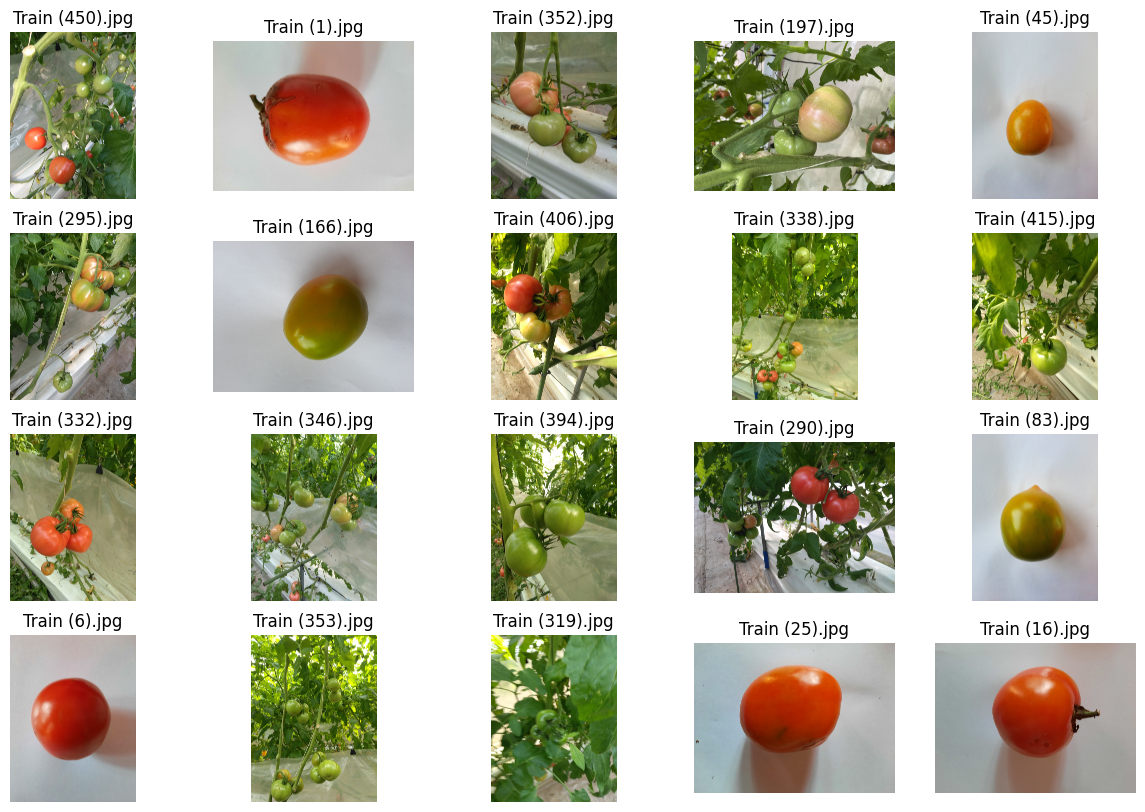

In [ ]:
random_imgs(train_dir)

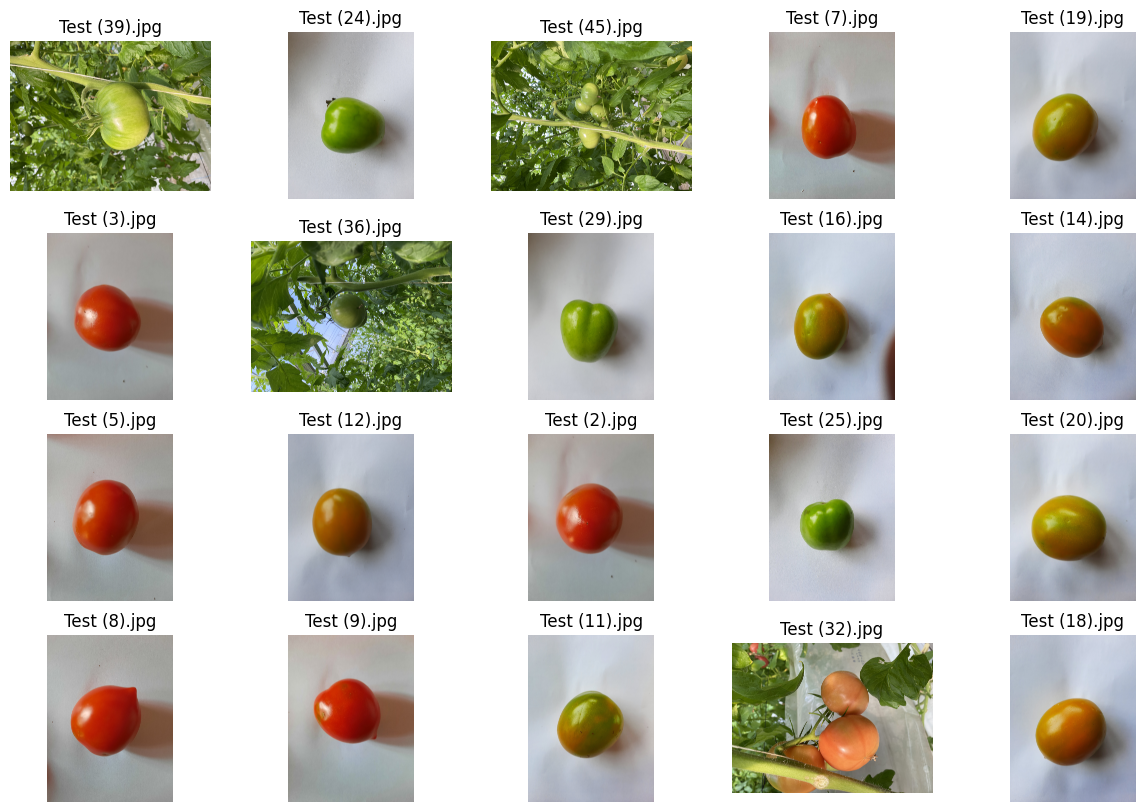

In [ ]:
random_imgs(test_dir)

## **Training Dataset dengan YoloV5**

In [ ]:
# Cloning repositori YOLOv5 & install requirements
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16800, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 16800 (delta 185), reused 181 (delta 95), pack-reused 16459
Receiving objects: 100% (16800/16800), 15.58 MiB | 23.95 MiB/s, done.
Resolving deltas: 100% (11488/11488), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-m

In [ ]:
# Membuat file dataset.yaml
dataset_yaml = """
path: /content/drive/My Drive/Dataset_Tomat_Gabungan
train: Train/images
val: Test/images

nc: 3
names: ['Tomat Matang', 'Tomat Setengah Matang', 'Tomat Mentah']
"""

with open('dataset.yaml', 'w') as file:
    file.write(dataset_yaml)

In [ ]:
#Total training = +-3 jam
!python train.py --img 416 --batch 16 --epochs 16 --data dataset.yaml --weights yolov5s.pt --cache

2024-07-12 16:37:29.779428: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 16:37:29.779489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 16:37:29.781037: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=16, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, opt

## **Deteksi ke Data Baru**

In [ ]:
# Deteksi pada data gambar baru TOMAT MATANG 1
!python detect.py --weights /content/best.pt --img 416 --conf 0.25 --source /content/tomat_matang1.jpeg

detect: weights=['/content/best.pt'], source=/content/tomat_matang1.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_matang1.jpeg: 288x416 4 Tomat Matangs, 164.9ms
Speed: 1.5ms pre-process, 164.9ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2


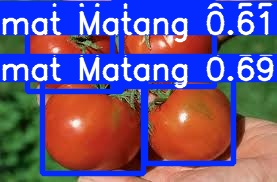

In [ ]:
from IPython.display import Image, display

image_path = 'runs/detect/exp2/tomat_matang1.jpeg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT MATANG 2
!python detect.py --weights /content/best.pt --img 416 --conf 0.25 --source /content/tomat_matang3.jpeg

detect: weights=['/content/best.pt'], source=/content/tomat_matang3.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_matang3.jpeg: 288x416 2 Tomat Matangs, 211.5ms
Speed: 1.6ms pre-process, 211.5ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp4


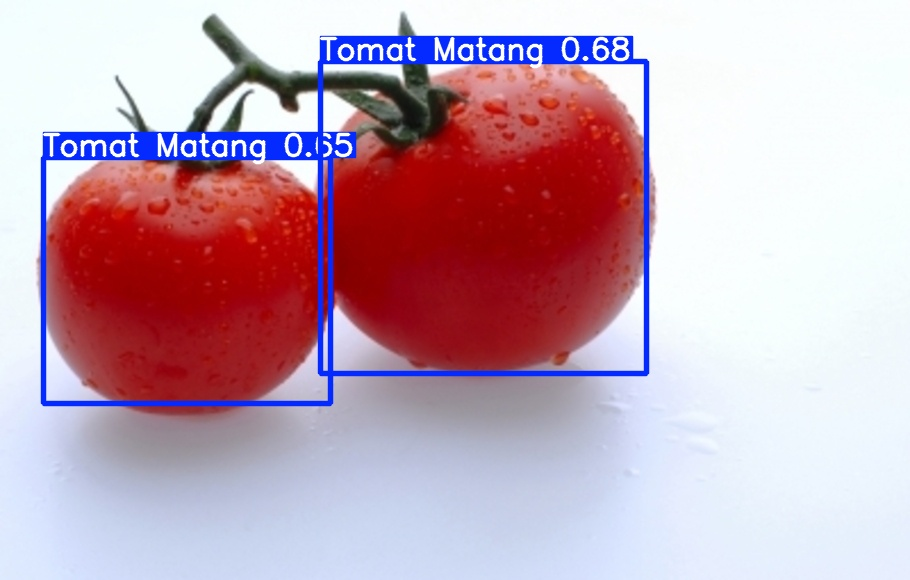

In [ ]:
image_path = 'runs/detect/exp4/tomat_matang3.jpeg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT SETENGAH MATANG 1
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_setengahmatang1.jpg

detect: weights=['/content/best.pt'], source=/content/tomat_setengahmatang1.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_setengahmatang1.jpg: 256x416 1 Tomat Matang, 1 Tomat Setengah Matang, 138.7ms
Speed: 2.7ms pre-process, 138.7ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp5


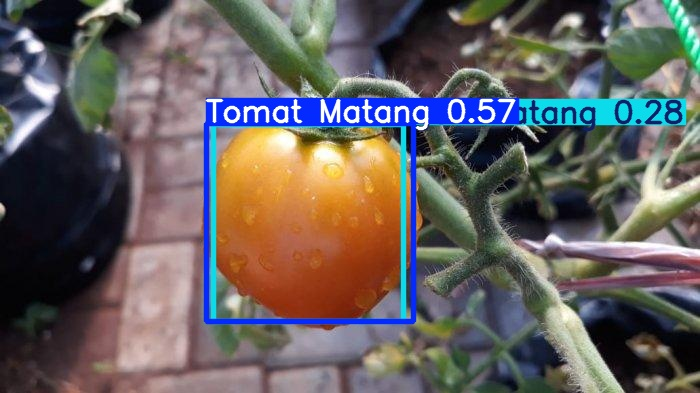

In [ ]:
image_path = 'runs/detect/exp5/tomat_setengahmatang1.jpg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT SETENGAH MATANG 2
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_setengahmatang2.jpg

detect: weights=['/content/best.pt'], source=/content/tomat_setengahmatang2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_setengahmatang2.jpg: 288x416 2 Tomat Matangs, 1 Tomat Setengah Matang, 243.2ms
Speed: 3.5ms pre-process, 243.2ms inference, 1.9ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp6


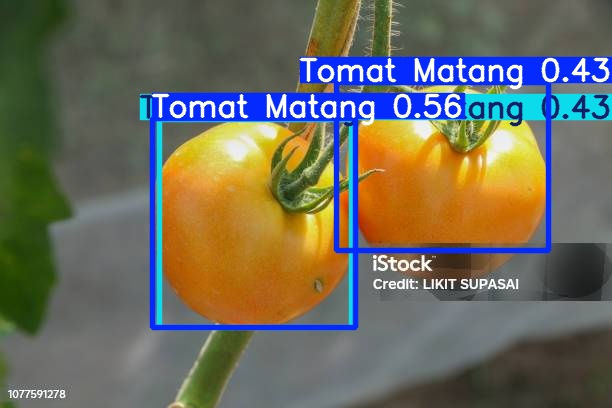

In [ ]:
image_path = 'runs/detect/exp6/tomat_setengahmatang2.jpg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT MENTAH 1
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_mentah1.jpg

detect: weights=['/content/best.pt'], source=/content/tomat_mentah1.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_mentah1.jpg: 288x416 3 Tomat Mentahs, 158.8ms
Speed: 1.6ms pre-process, 158.8ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp8


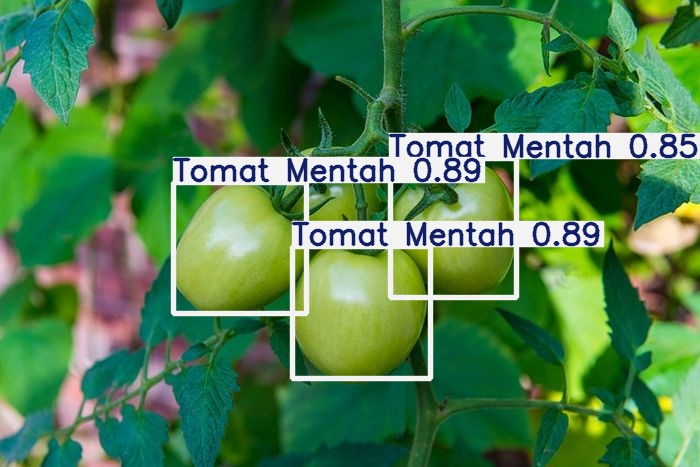

In [ ]:
image_path = 'runs/detect/exp8/tomat_mentah1.jpg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT MENTAH 2
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_mentah2.jpg

detect: weights=['/content/best.pt'], source=/content/tomat_mentah2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_mentah2.jpg: 288x416 3 Tomat Mentahs, 144.3ms
Speed: 0.7ms pre-process, 144.3ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp7


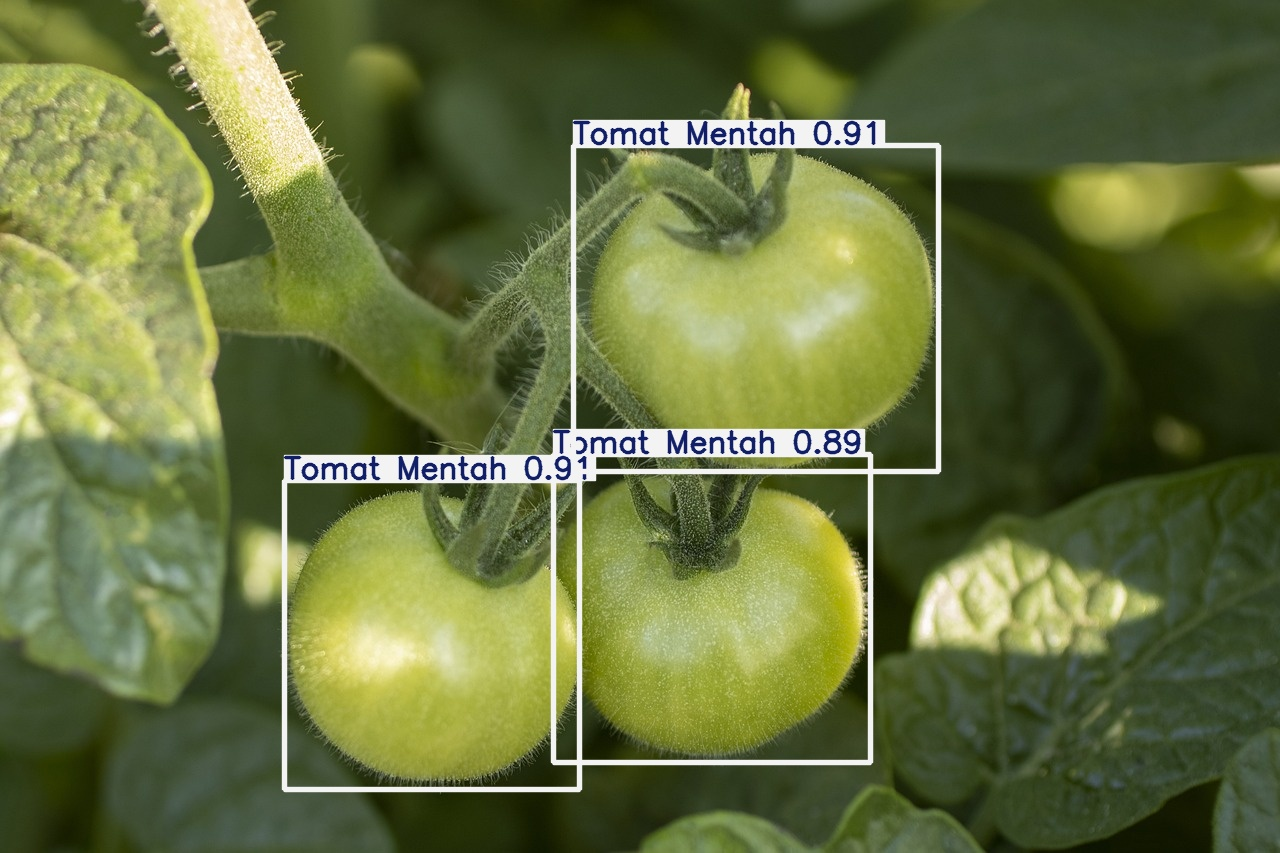

In [ ]:
image_path = 'runs/detect/exp7/tomat_mentah2.jpg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT MENTAH 3
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_mentah3.jpg

detect: weights=['/content/best.pt'], source=/content/tomat_mentah3.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_mentah3.jpg: 288x416 1 Tomat Mentah, 147.3ms
Speed: 0.8ms pre-process, 147.3ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp9


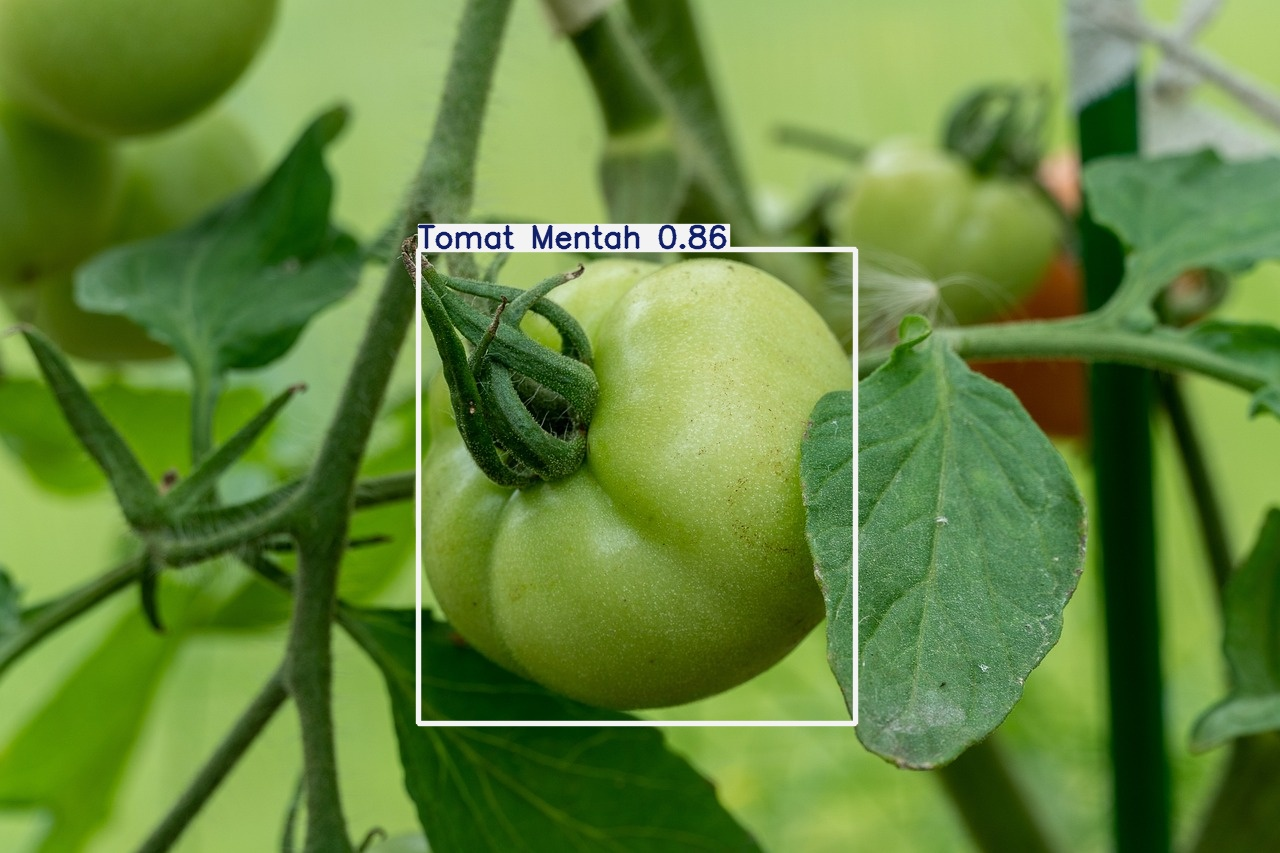

In [ ]:
image_path = 'runs/detect/exp9/tomat_mentah3.jpg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT GABUNGAN 1
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_gabungan1.png

detect: weights=['/content/best.pt'], source=/content/tomat_gabungan1.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_gabungan1.png: 160x416 2 Tomat Matangs, 2 Tomat Setengah Matangs, 1 Tomat Mentah, 84.6ms
Speed: 0.7ms pre-process, 84.6ms inference, 1.1ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp10


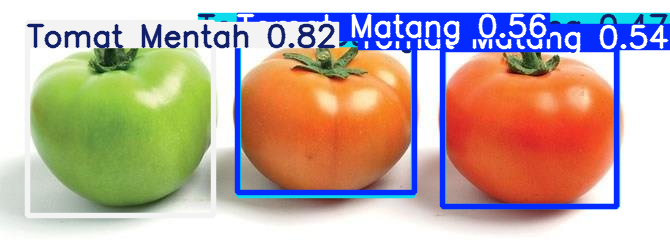

In [ ]:
image_path = 'runs/detect/exp10/tomat_gabungan1.png'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT GABUNGAN 2
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_gabungan2.jpg

detect: weights=['/content/best.pt'], source=/content/tomat_gabungan2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_gabungan2.jpg: 288x416 1 Tomat Matang, 1 Tomat Setengah Matang, 2 Tomat Mentahs, 146.0ms
Speed: 1.6ms pre-process, 146.0ms inference, 2.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp11


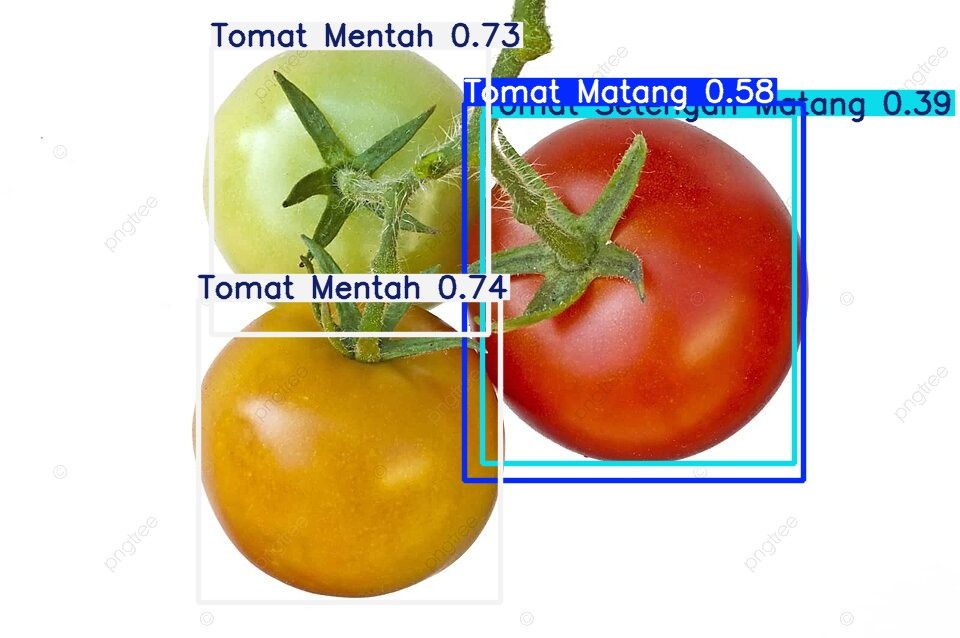

In [ ]:
image_path = 'runs/detect/exp11/tomat_gabungan2.jpg'

display(Image(filename=image_path))

In [ ]:
# Deteksi pada data gambar baru TOMAT GABUNGAN 3
!python detect.py --weights  /content/best.pt --img 416 --conf 0.25 --source /content/tomat_gabungan3.jpg

detect: weights=['/content/best.pt'], source=/content/tomat_gabungan3.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/tomat_gabungan3.jpg: 288x416 5 Tomat Matangs, 6 Tomat Setengah Matangs, 1 Tomat Mentah, 139.3ms
Speed: 1.2ms pre-process, 139.3ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp12


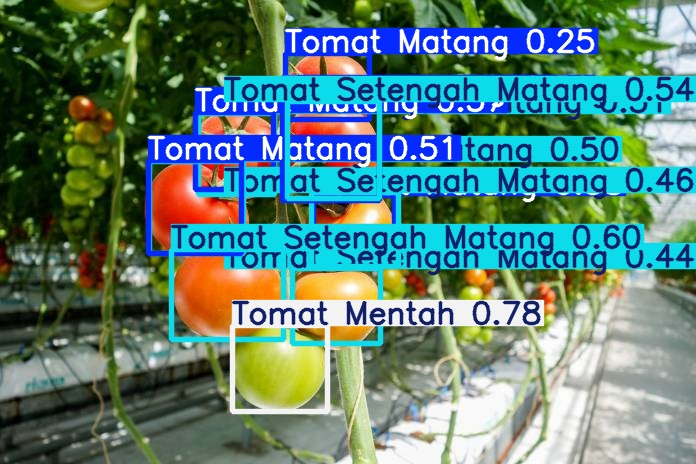

In [ ]:
image_path = 'runs/detect/exp12/tomat_gabungan3.jpg'

display(Image(filename=image_path))